In [1]:
## Mount Google drive to Colab Notebook
from google.colab import drive  
drive.mount('/content/drive')
%cd /content/drive/'My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [2]:
## Import modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
from collections import Counter

## Data processing
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


## Ensemble learning
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


## TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Unzip data file and read dataset

In [3]:
pwd # working directory

'/content/drive/My Drive'

In [4]:
# Unzip data
#directory_to_extract_to='/content/drive/My Drive'
#with zipfile.ZipFile('/content/drive/My Drive/archive.zip', 'r') as zip_ref:
 #   zip_ref.extractall(directory_to_extract_to)

In [5]:
# Read dataset
data=pd.read_csv('creditcard.csv') 
print('\nDataframe size:\n\n',data.shape,'\n\n')
data.head()


Dataframe size:

 (284807, 31) 




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

- Dataset is consisted of 284807 credit card transactions.
- Class is the target variable with values of 0 and 1 which represent Non-fraud and fraud transactions, respectively.
- Thare are 30 features:
              1.   V1,..,V28 are components of PCA transformation
              2.   Time is number of seconds elapsed between the transactions and the first transaction in the dataset.
              3.   Transaction amount is respresented by Amount column in the dataset.
- In the following section, exploratory analysis is conducted to analyze and investigate the dataset to get useful insights into it. 



In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

It is observed that:

- There are no missing data in the dataset.

- The mean values of V1,...,V28 features are close to zero with small standard deviation. Therefore, it is not needed to scale/normalize these features. This was expected because the first step of PCA transformation is normalizing the dataset.

- Time feature is consisted of seconds between transactions for 2 consecutive days and minimum and maximum of this feature are 0 and approximately 172800 (i.e. 60 * 60 * 48) respectively. 

- Amount feature has mean of 88 and standard deviation of 250. According to the mean and standard deviation and quantile values, it is clear that Amount feature is highly skewed.



Number of non_fraud cases are 284315
Number of fraud cases are 492 


Class percentage:
 0    99.827251
1     0.172749
Name: Class, dtype: float64 




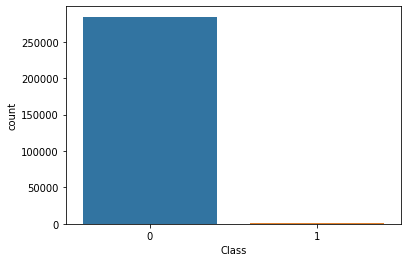

In [8]:
## Target variable
print('\nNumber of non_fraud cases are {}\nNumber of fraud cases are {} \n\n'.format(data['Class'].value_counts()[0],data['Class'].value_counts()[1]))
print('Class percentage:\n',data['Class'].value_counts()/data.shape[0]*100,'\n\n')
sns.countplot(data['Class'],data=data);

Dataset is heavily imbalanced. Below are some of the methods to deal with imbalanced dataset:
1. Choose a suitable perfomance metric:

   In this problem, the approach would be to detect all of the fraud cases and don't miss any. So, fn(FalseNegative) is important. Therefore, Recall was chosen as the main performance metric in this problem.
2. Balance dataset using rebalancig techniques such as oversampling the minority class or undersampling the majority class.
3. Overweight loss of minority class and underweight loss of majority class in the loss function of model training procedure.  

**Note** we can't conduct complete exploratory analysis without rebalancing data. For example correlation b/w features and traget variable is highly impacted by imbalanced dataset and we are not able to discover the true correlation between features and target variable.







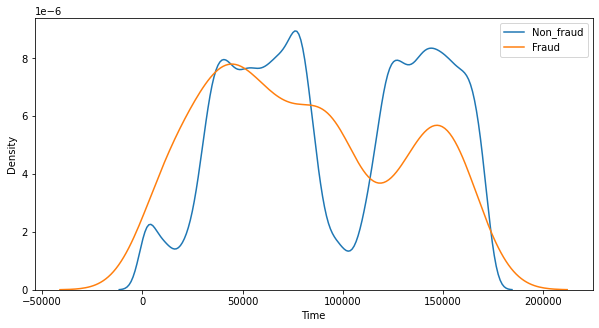

In [9]:
## Time feature
plt.figure(figsize=(10,5))
sns.distplot(data[(data['Class']==0)]['Time'],hist=False);
sns.distplot(data[(data['Class']==1)]['Time'],hist=False);
plt.legend(('Non_fraud','Fraud'));


Distributions of Time feature for Fraud and Non-fraud cases are plotted above. 

*   In this dataset, transactions are for the entire two days and according to the distribution plot, it is clear that distribution of both Fraud and Non-fraud transactions are similar for each day. Hence, it is better to redefine the time feature as the seconds elapsed between the transaction and the first transaction of the day.(Considering the first transaction of each day as the ground level of time for all transactions of that day). **Feature Engineering**



**Note** Dataset is imbalanced and comparing histograms is not accepted. So, density of classes are plotted. 


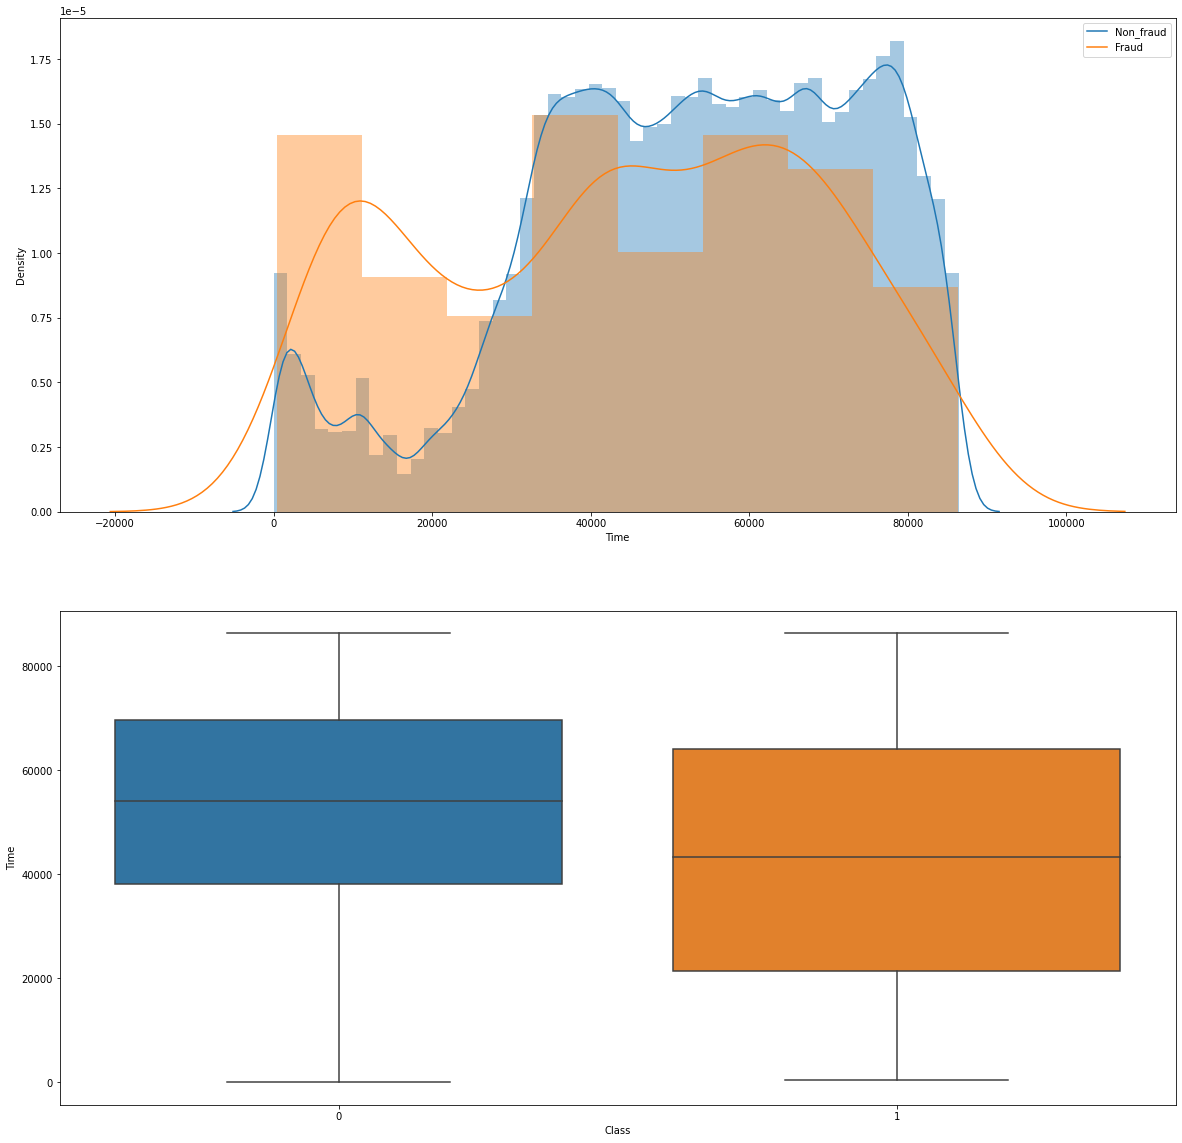

In [10]:
# Preprocessing 1
# Change the Time feature as it represents seconds between transactions on each day. (0 to 60*60*24)
def time_processing(x):
  if x>86400: 
    x=x-86400
  return x
data['Time']=data['Time'].apply(time_processing)
data = data.sample(frac=1).reset_index(drop=True) #shuffle data
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.distplot(data[(data['Class']==0)]['Time']);
sns.distplot(data[(data['Class']==1)]['Time']);
plt.legend(('Non_fraud','Fraud'));
plt.subplot(2,1,2)
sns.boxplot(y='Time',data=data,x='Class');

As shown above, the two plots sugest that:

- For the first 1/3 of a day (first 8 hours of a day), the number of non-fraud transactions is lower than the rest of the day. This is expected as non-fraud cases do not normally take place in the midnight or early of hours of a day.
- There are high number of fraud cases in early hours of a day.
- According to boxplots, upper quartile, median and lower quartile of the fraud cases are lower than those of non_fraud cases. So, fraud cases are more likely to happen earlier in the day than non_fraud cases and there is negative correlation between time and class variables. 

**Note** Density of the distribution is plotted for both cases because the number of fraud cases is significantly lower than non-fraud cases.



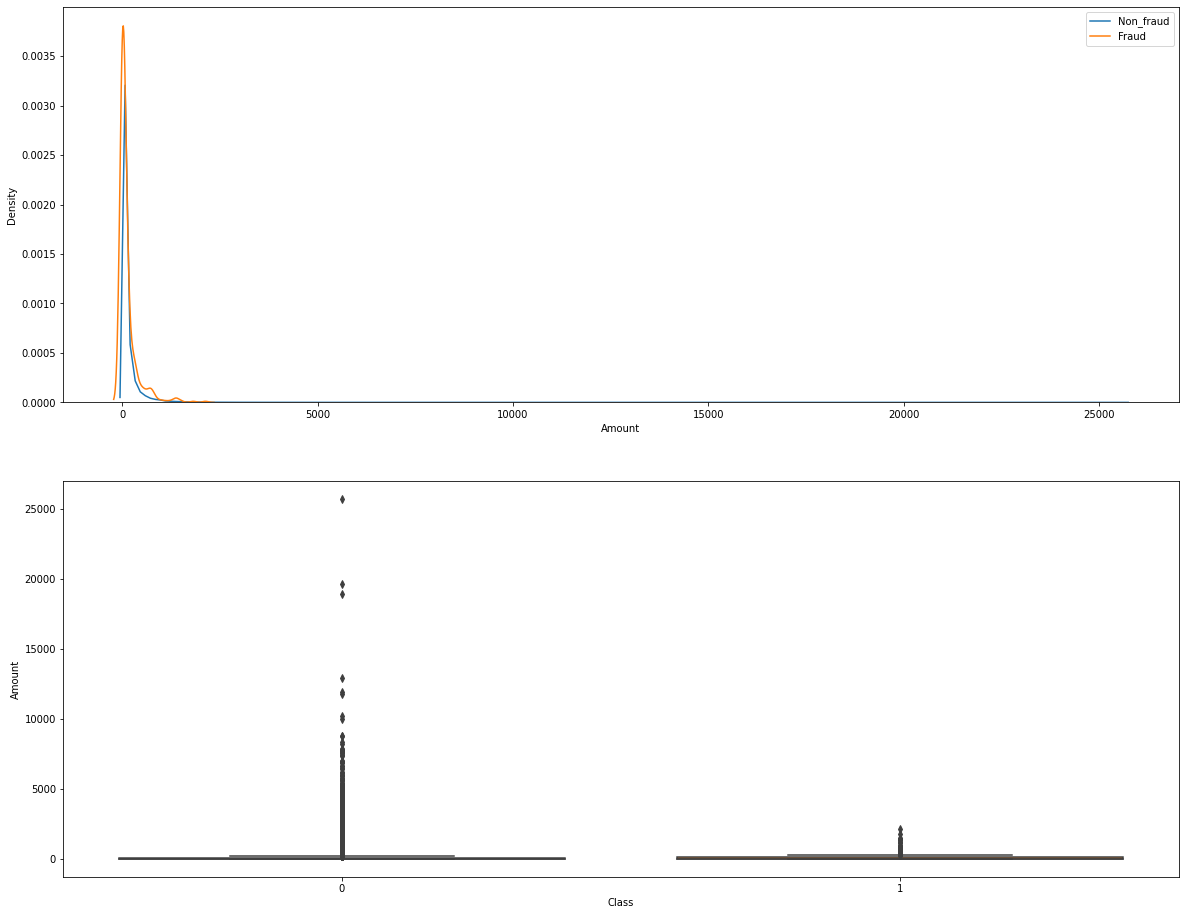

In [11]:
## Amount feature
plt.figure(figsize=(20,16))
plt.subplot(2,1,1)
sns.distplot(data[(data['Class']==0)]['Amount'],hist=False)
sns.distplot(data[(data['Class']==1)]['Amount'],hist=False)
plt.legend(('Non_fraud','Fraud'))

plt.subplot(2,1,2)
sns.boxplot(y='Amount',data=data,x='Class');

In [12]:
print('Fraud:\n',data[data['Class']==1]['Amount'].describe())
print('\n\n Non-Fraud:\n',data[data['Class']==0]['Amount'].describe())

Fraud:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


 Non-Fraud:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


It is observed that:
- Amount feature is strongly skewed and there are outliers. 
- The mean of the Amount feature for fraud transactions is higher than that of non-fraud transactions (122 and 88, respectively). However, the lower quantile and median and maximum of the non_fraud transactions are much higher for fraud cases. This is expected as the person who engages in fraud avoids having large transactions in order to avoid drawing any attention.

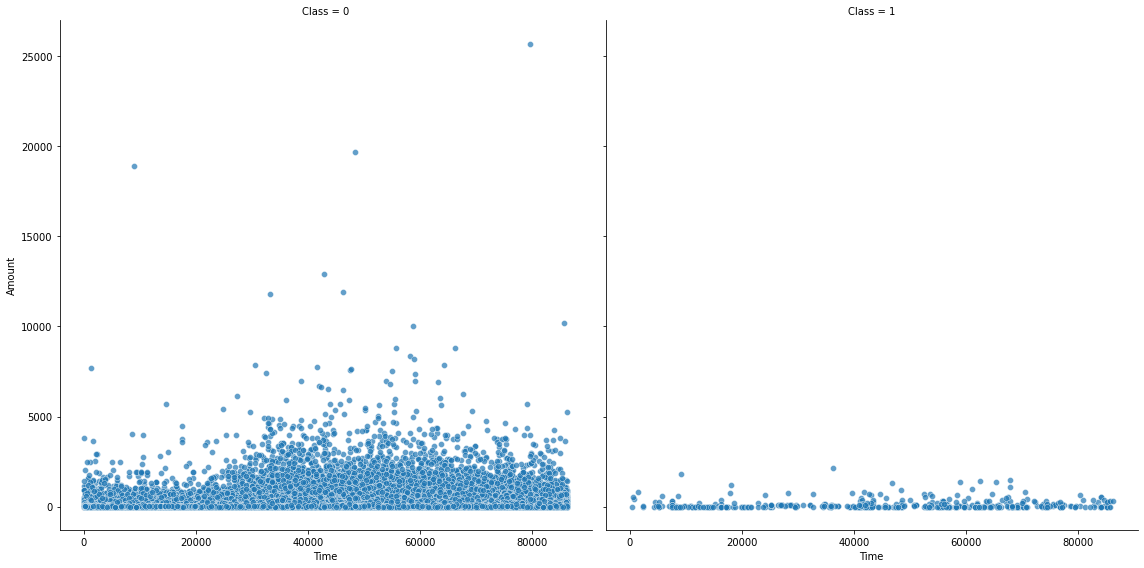

In [13]:
## Time and Amount 
g = sns.FacetGrid(data, col='Class',height=8)
g.map(sns.scatterplot, 'Time', 'Amount',alpha=.7);

- Overall, the amount of fraud cases is remarkably lower than the amount of non-fraud cases.

- Over time, the amount of fraud transactions are almost constant and relatively small values. 

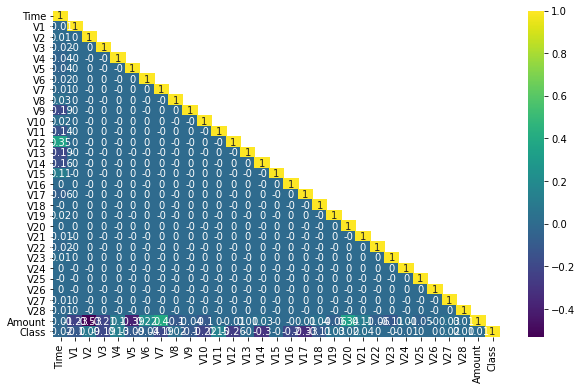

In [14]:
# Correlation heatmap
corr=data.corr()
z=np.round(corr.to_numpy(),2)
z[np.triu_indices_from(z,1)]=np.nan
plt.figure(figsize=(10,6))
sns.heatmap(z,annot=True,xticklabels=list(data.columns), yticklabels=list(data.columns),cmap='viridis');

- All correlations between features V1,..,V28 are 0. This is expected because the features are components of PCA transformation and we know that correlation between principal components are zero.

**Correlation between target variable and features are small and we know that they are not reliable due to the imbalance nature of the dataset.**

## **Rebalancing Dataset:**
In this part, the data is rebalanced to do more exploratory analysis on it and to find realationship between the features and the target variable. Rebalancing techniques that are used are as follows:


1.   Undersampling the majority class using random selection
2.   Oversampling the minority class by generationg synthetic samples (SMOTE technique)



Class count after undersampling: {0: 615, 1: 492}


Class count after oversampling: {0: 615, 1: 615} 




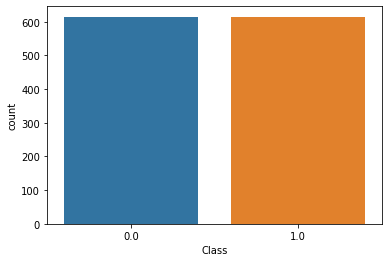

In [15]:
# Resampling
## Undersampling
rus= RandomUnderSampler(sampling_strategy=0.8 ,random_state=42)
data_resampled,y_resampled=rus.fit_resample(data.drop('Class',axis=1),data['Class'])
print('Class count after undersampling:',dict(Counter(y_resampled)))
    
## Oversampling
sm = SMOTE(k_neighbors= 7 , random_state=42) #New samples are generated between a random selected point from the minor class and its 7 nearest neighbors 
data_resampled, y_resampled = sm.fit_resample(data_resampled, y_resampled)
print('\n\nClass count after oversampling: {} \n\n'.format(dict(Counter(y_resampled))))


# Target variable
Resampled=np.insert(data_resampled,30,y_resampled,axis=1)
Reasampled_df=pd.DataFrame(Resampled,columns=data.columns)
Reasampled_df= Reasampled_df.sample(frac=1).reset_index(drop=True)
sns.countplot(Reasampled_df['Class']);

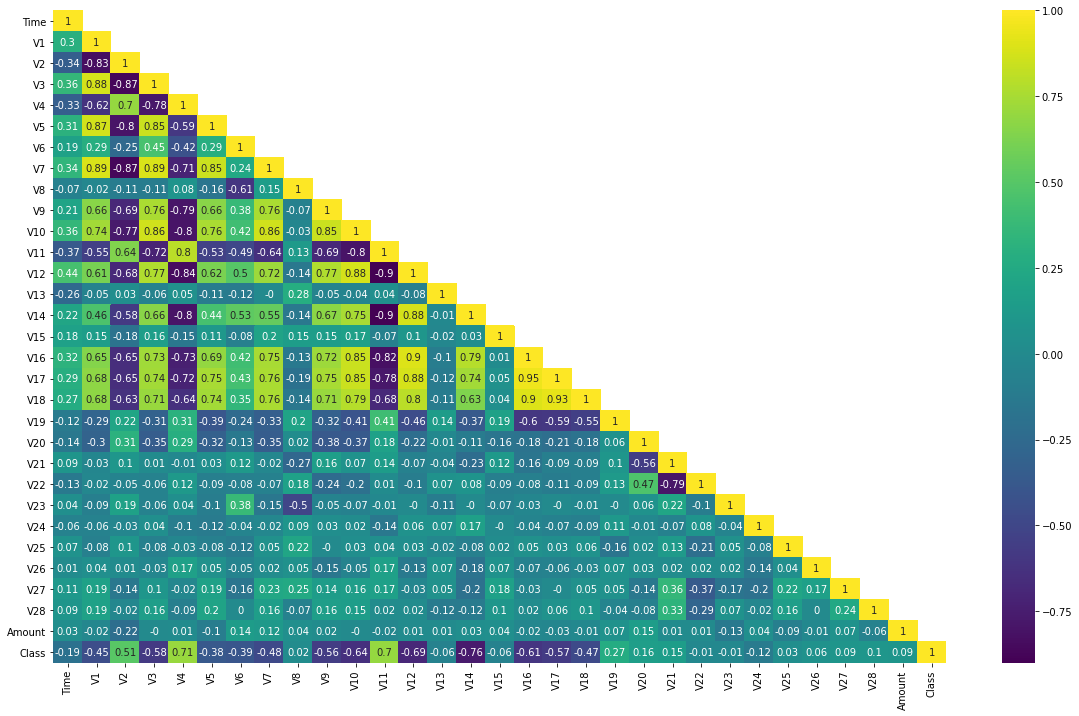

In [16]:
# Correlation heatmap
corr=Reasampled_df.corr()
z=np.round(corr.to_numpy(),2)
z[np.triu_indices_from(z,1)]=np.nan
plt.figure(figsize=(20,12))
sns.heatmap(z,annot=True,xticklabels=list(data.columns), yticklabels=list(data.columns),cmap='viridis');



*   **Positive Correlation** There is strongly positive correlation between V2,V4 and V11 features and the target variable
*   **Negative Correlation** V9, V10, V12, V16, V17 are negatively correlated with the target variable.



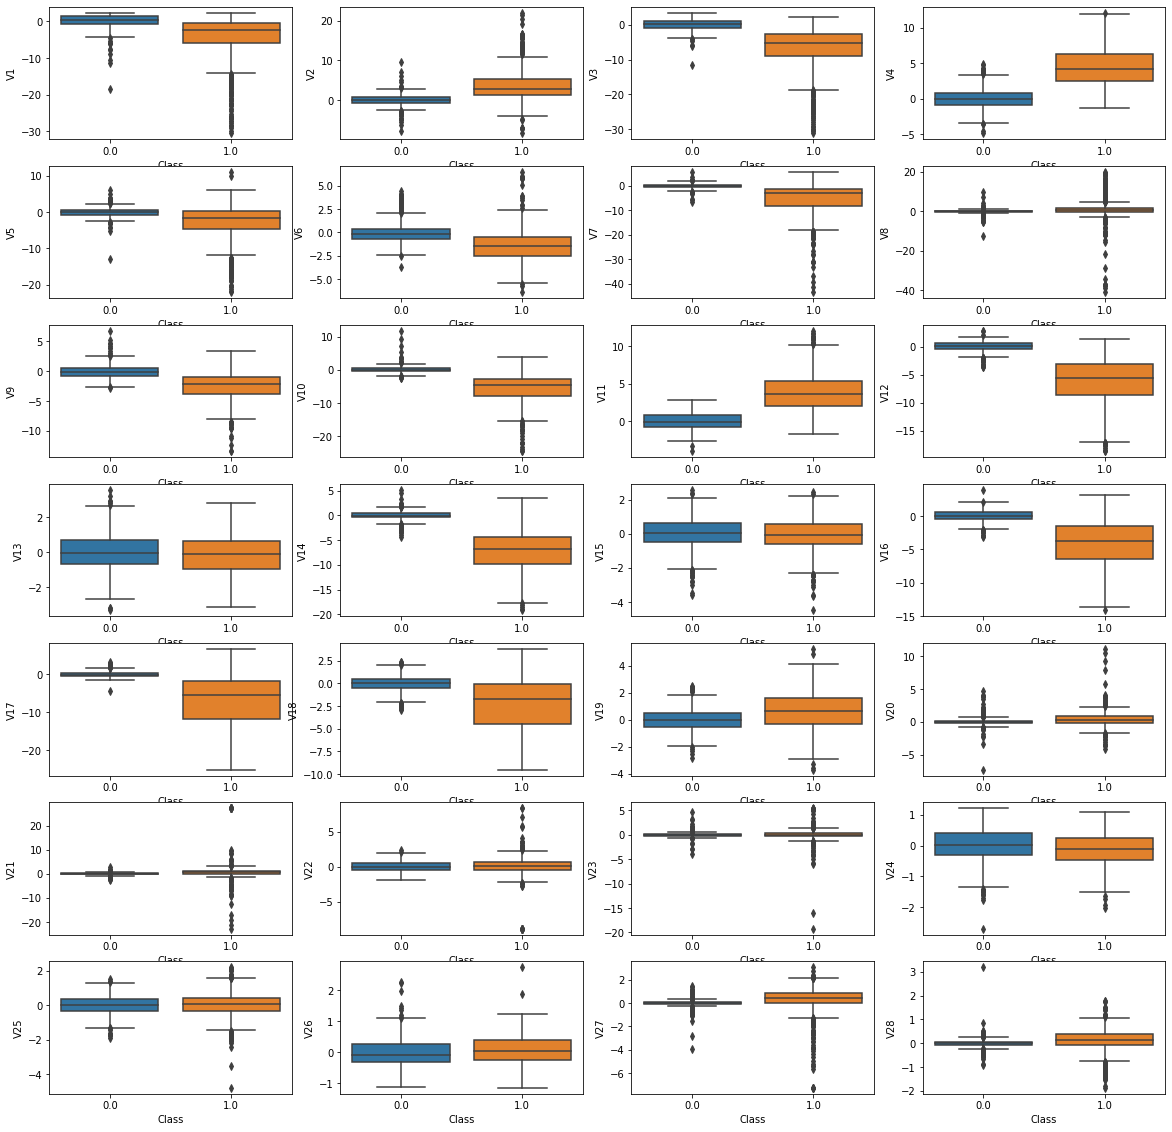

In [17]:
# Boxplots
d=Reasampled_df.drop(['Time','Amount'],axis=1)
plt.figure(figsize=(20,20))
for i in range(28):
  plt.subplot(7,4,i+1)
  sns.boxplot(y=d.iloc[:,i],data=d,x='Class')
  

According to the boxplots, it is observed that:
- Positive and negative correlation between some of the features and the target variable is clear. For example, there is positive correlation between V4 and Class. So, fraud transactions have higher V4 value.
- There are outliers in the dataset and some investigation are required on it.

## **Outliers**
 - Boxplots showed that there are outliers in the dataset. So, interquartile range (IQR) of features are explored. Next, the threshold of 3 is set as the measure of variablity of data to detect possible outliers.



In [18]:
# Find Interquartile of features
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Time      31433.500000
V1            2.236015
V2            1.402274
V3            1.917560
V4            1.591981
V5            1.303524
V6            1.166861
V7            1.124512
V8            0.535976
V9            1.240237
V10           0.989349
V11           1.502088
V12           1.023810
V13           1.311044
V14           0.918724
V15           1.231705
V16           0.991333
V17           0.883423
V18           0.999657
V19           0.915248
V20           0.344762
V21           0.414772
V22           1.070904
V23           0.309488
V24           0.794113
V25           0.667861
V26           0.567936
V27           0.161885
V28           0.131240
Amount       71.565000
Class         0.000000
dtype: float64


In [19]:
new_df= (data < (Q1 - 3 * IQR)) | (data > (Q3 + 3 * IQR))
new_df=new_df.drop(['Class'],axis=1)
data_new=data[~new_df.any(axis=1)] # Remove outliers 
data_new.value_counts('Class')

Class
0    231431
1        40
dtype: int64

- By removing the outliers, there would be 40 fraud transactios in the dataset.
I decided to keep the outliers because I don't want to reduce the number of fraud transactions. 

# **Predictive Models**

In this project, two predictive models are developed:


1.   Ensemble learning technique

     In the following section, an Extreme Gradient boosting Classifier is trained to predict fraudulent transactions.
2.   Neural Network model
  
     In this part, A simple Neural Network model is trained on the balanced dataset. 



# **1. Ensemble Learning**
In this part, the XGBoosting classifier is used to create a predictive model. The following steps are taken:


1. The stratified cross-validation is used to split the dataset into train and test datasets (5 folds).
2. The train dataset is scaled. In order to prevent data leakage, scaling alghoritm is fitted only on the train dataset. Moreover, it is not needed to scale the features that are components of PCA transformation since they are already scaled.
3. In the next step, the train dataset is scaled. It should be noted that ONLY the train dataset is rebalanced and test dataset retained the original distribution.

4. GridSearchCV is used to find the best hyperparameters.

**Evaluation** Recall and ROC_AUC are the main metrics that are used to evaluate the model using the test dataset. Also, confusion matrix is investigated.


**Note**  Resampling techniques has some drawbacks! In undersampling technique, there is a possibility of information loss which would lead to inaccurate model. In the SMOTE oversampling technique, it is likely that generated data are false and misleading.



In [20]:
## UnderSampling the majority class and Oversampling the minority class
## Number of the cases in majority class are 284315 and number of the cases in minority class is 492.
X = data.drop('Class', axis=1)
y = data['Class']
scaler = MinMaxScaler()

scv = StratifiedKFold(n_splits=5)
recall_xgboost=[]
ROC_AUC_xgboost=[]

for train_index, test_index in scv.split(X, y):
    print('\n\nLength of Train set:{}\nLength of Test set: {}'.format(len(train_index), len(test_index)))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    ## Scale features
    ## To prevent the data leakage, do not fit the scaler on test dataset
    ## V1,..,V28 are scaled. I only scaled Time and Amount columns

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Time_Amount_train , Time_Amount_test= X_train[['Time','Amount']] , X_test[['Time','Amount']]

    X_train[['Time','Amount']]= scaler.fit_transform(Time_Amount_train)
    X_test[['Time','Amount']] = scaler.transform(Time_Amount_test)

    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Undersample
    rus = RandomUnderSampler(sampling_strategy=0.8 ,random_state=42)
    X_res, y_res = rus.fit_resample(X_train,y_train)
    #print(Counter(y_res))
    
    # Oversample
    sm = SMOTE(k_neighbors= 7 , random_state=42)
    X_res, y_res = sm.fit_resample(X_res, y_res)
    print("Class count on balanced dataset: {} ".format(dict(Counter(y_res))))
    
    ## I used gridsearchCV for hyperparameter tunning
    parameters={"learning_rate"    : [0.15, 0.20, 0.25, 0.30 ] ,
                "max_depth"        : [ 3, 5, 6, 8, 10, 12, 15],
                "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ] }
    xgbooster = GridSearchCV(XGBClassifier(random_state=42), parameters)
    xgbooster.fit(X_res, y_res)
    print(xgbooster.best_params_)
    #xgbooster=XGBClassifier(gamma=0,learning_rate=0.2,max_depth=5,random_state=42).fit(X_res, y_res)

    
    recall_xgboost.append(metrics.recall_score(y_test,xgbooster.predict(X_test.values)))
    ROC_AUC_xgboost.append((metrics.roc_auc_score(y_test,xgbooster.predict(X_test.values))))



Length of Train set:227845
Length of Test set: 56962
Class count on balanced dataset: {0: 491, 1: 491} 
{'gamma': 0.4, 'learning_rate': 0.3, 'max_depth': 8}


Length of Train set:227845
Length of Test set: 56962
Class count on balanced dataset: {0: 491, 1: 491} 
{'gamma': 0.3, 'learning_rate': 0.25, 'max_depth': 3}


Length of Train set:227846
Length of Test set: 56961
Class count on balanced dataset: {0: 492, 1: 492} 
{'gamma': 0.4, 'learning_rate': 0.25, 'max_depth': 10}


Length of Train set:227846
Length of Test set: 56961
Class count on balanced dataset: {0: 492, 1: 492} 
{'gamma': 0.1, 'learning_rate': 0.25, 'max_depth': 12}


Length of Train set:227846
Length of Test set: 56961
Class count on balanced dataset: {0: 492, 1: 492} 
{'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 10}


In [21]:
# Recall
print("Average recall is",np.mean(recall_xgboost)*100)
print("\nrecall:\n")
print(recall_xgboost)

# Area under ROC curve  
print("\nAverage ROC-AUC is",np.mean(ROC_AUC_xgboost)*100)
print("\nROC-AUC:\n")
print(ROC_AUC_xgboost)

Average recall is 90.44733044733044

recall:

[0.9090909090909091, 0.898989898989899, 0.9285714285714286, 0.9081632653061225, 0.8775510204081632]

Average ROC-AUC is 93.74432013107426

ROC-AUC:

[0.9424374053746405, 0.9355139776855128, 0.951113704367138, 0.9367856757039027, 0.9213652434225188]


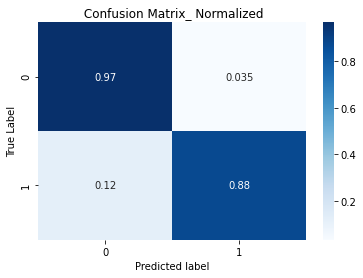

In [22]:
#Confussion matrix
cf_matrix=metrics.confusion_matrix(y_test,xgbooster.predict(X_test.values))
cf_matrix_normalized=cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:,np.newaxis] # Test dataset is significantly imbalanced and I have to normalize it.
sns.heatmap(cf_matrix_normalized,cmap='Blues' ,annot=True);
plt.xlabel('Predicted label');
plt.ylabel('True Label');
plt.title(" Confusion Matrix_ Normalized");

**The average recall score for detecting fraud ceases using XGBoosting classsifier is 91%.**

# **Neural Network**

In this section, a neural network model is implemented to classify the credit card transactions.

**Dataset** Similar to the previous section, the dataset is normalized and the majority class is undersampled in order to rebalance the dataset. 

**Neural Network Structure** The NN model is composed of an input layer with 30(number of features) units and 2 hidden layers. In each hidden layer, the number of units are halved relative to previous layer's number of units. The output layer has 1 unit with sigmoid activation function since this is a binary classification model. Moreover, the loss function is "Binary Crossentropy" and Adam optimizer with 0.001 learning rate is used to solve it.

The model is fitted on train dataset and tested on validation dataset using batchsize of 128 and 400 epochs. It is likely the model overfits. Therefore, some measures are taken to prevent overfitting which are:  

1. Dropout layers are added for input layers and hidden layers
2. Earlystopping is added

Moreover, in order to pay more attention to fraud cases, the class weight is added to put more weight on the loss of fraud casses than non-fraud cases. Note that this weighting scheme will not be used in testing the model.

**Evaluation** The trained model is used to predict the Class of the test dataset which has the class distribution of original dataset (It is not balanced). Similar to the previous section, the Recall and ROC_AUC metrics are used to evaluate the model. Moreover, confusion matrix and classification report is investigated. 

In [23]:
# train/test split
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) # Train/Test split
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train, test_size=0.20, random_state=42, stratify=y_train)# Train/Validation split
y_train.value_counts()

0    181961
1       315
Name: Class, dtype: int64

In [24]:
# Data reprocessing -- Scaling Time and Amount features
# To prevent data leakage, fit scaler on train dataset
Time_Amount_train, Time_Amount_val , Time_Amount_test= X_train[['Time','Amount']],X_val[['Time','Amount']] , X_test[['Time','Amount']]
scaler=MinMaxScaler()
X_train[['Time','Amount']]= scaler.fit_transform(Time_Amount_train)
X_val[['Time','Amount']] = scaler.transform(Time_Amount_val)
X_test[['Time','Amount']] = scaler.transform(Time_Amount_test)


In [25]:
# Data reprocessing -- Resampling the train dataset
# Undersamplig the majority class
rus = RandomUnderSampler(sampling_strategy=1 ,random_state=42) # Equal number of fraud and non-fraud cases
X_res, y_res = rus.fit_resample(X_train,y_train)

# Oversample
sm = SMOTE(sampling_strategy='minority',k_neighbors= 5 , random_state=42)
X_res, y_res = sm.fit_resample(X_res, y_res)

# Shuffle train data
shuffler=np.random.RandomState(seed=42).permutation(len(y_res))
X_res , y_res = X_res[shuffler],y_res[shuffler]


print('Number of each Class in train data:\n',dict(Counter(y_res)))
print('\nNumber of each Class in validation data:\n',dict(Counter(y_val)))
print('\nNumber of each Class in test data:\n',dict(Counter(y_test)))

Number of each Class in train data:
 {1: 315, 0: 315}

Number of each Class in validation data:
 {0: 45490, 1: 79}

Number of each Class in test data:
 {0: 56864, 1: 98}


In [26]:
# Train dataset
d=np.insert(X_res,30,y_res,axis=1)
data_res=pd.DataFrame(d,columns=list(data.columns))
data_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.201481,-4.517344,2.500224,-4.013928,1.189452,-2.486861,-1.413476,-4.245707,1.265087,1.168828,-4.513907,3.694711,-6.110443,-0.110522,-4.184555,-0.931035,-1.614718,-3.353180,0.236762,0.003896,-1.056162,1.326944,0.102999,0.508167,-0.278018,0.139721,0.064610,-0.972358,0.351360,0.000088,1.0
1,0.703287,-0.647850,-0.134082,0.684686,2.011846,-0.961136,0.345571,-0.584075,-2.638011,-0.325154,-0.801237,-0.309533,0.149366,-1.585698,0.923929,0.408765,-0.984654,1.005245,-0.757632,0.055729,1.175792,-1.126419,0.222775,-0.268188,0.598594,0.579048,-0.208199,0.074393,0.305558,0.012806,0.0
2,0.731273,-4.280584,1.421100,-3.908229,2.942946,-0.076205,-2.002526,-2.874155,-0.856005,0.963674,-3.235439,3.341802,-7.562860,-1.847443,-11.571423,-1.481556,-6.180919,-9.285186,-3.921722,0.685511,-0.198963,-0.140062,-0.907720,-0.680108,-0.349170,0.056276,-1.149923,-1.809886,0.723051,0.000043,1.0
3,0.879236,1.318696,-0.604922,0.155598,-0.563585,-0.969628,-0.894251,-0.382429,-0.130647,-0.934818,0.758244,1.276605,-0.083219,-0.768885,0.145396,-0.872165,0.695564,0.483165,-1.148974,1.023768,0.059656,0.223181,0.572523,-0.165732,0.583425,0.700134,-0.096070,-0.021958,-0.001128,0.001401,0.0
4,0.559826,-0.967767,2.098019,-5.222929,6.514573,-4.187674,2.114178,0.948701,-2.448427,-3.203666,-3.074034,1.051486,-3.474863,0.573371,-5.254253,-0.326388,-1.848598,-2.421536,-0.833345,0.952141,1.147204,-0.843268,0.796739,1.314312,-0.352887,-1.770706,0.098133,0.956769,0.162777,0.036017,1.0


In [27]:
# Artificial Neural Network
np.random.seed(1331)
model = Sequential()

# input layer
model.add(Dense(30,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001),
              metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
              )


Earlystop = EarlyStopping(monitor='val_loss',min_delta=0.009 ,verbose=1, patience=25)
model.fit(x=X_res, 
          y=y_res, 
          epochs=400,
          batch_size=128,
          verbose=1,
          shuffle= False,
          class_weight={0:1,1:2},
          callbacks=[Earlystop],
          validation_data=(X_val, y_val) )

Epoch 1/400
5/5 [==============================] - 1s 259ms/step - loss: 1.3304 - recall: 0.6603 - auc: 0.5756 - val_loss: 0.8553 - val_recall: 0.8861 - val_auc: 0.8340
Epoch 2/400
5/5 [==============================] - 1s 188ms/step - loss: 1.0449 - recall: 0.7873 - auc: 0.7025 - val_loss: 0.8627 - val_recall: 0.9367 - val_auc: 0.8614
Epoch 3/400
5/5 [==============================] - 1s 183ms/step - loss: 0.9261 - recall: 0.8127 - auc: 0.7446 - val_loss: 0.8624 - val_recall: 0.9494 - val_auc: 0.8816
Epoch 4/400
5/5 [==============================] - 1s 183ms/step - loss: 0.7670 - recall: 0.8952 - auc: 0.8111 - val_loss: 0.8576 - val_recall: 0.9747 - val_auc: 0.9025
Epoch 5/400
5/5 [==============================] - 1s 183ms/step - loss: 0.7342 - recall: 0.8889 - auc: 0.8053 - val_loss: 0.8503 - val_recall: 0.9747 - val_auc: 0.9173
Epoch 6/400
5/5 [==============================] - 1s 183ms/step - loss: 0.7104 - recall: 0.9016 - auc: 0.8215 - val_loss: 0.8394 - val_recall: 0.9747 - va

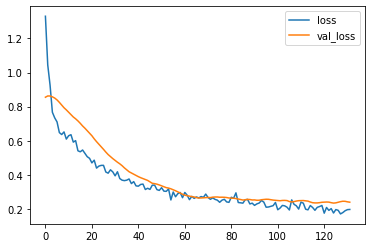

In [28]:
# Plot training loss and validation loss over training the model
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


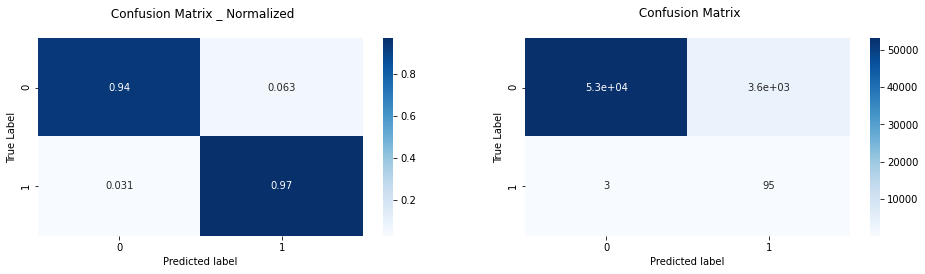

In [29]:
predictions= model.predict_classes(X_test)
cf_matrix=metrics.confusion_matrix(y_test,predictions)
cf_matrix_normalized=cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:,np.newaxis] # Test dataset is significantly imbalanced and I have to normalize it.
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.heatmap(cf_matrix_normalized,cmap='Blues' ,annot=True);
plt.xlabel('Predicted label');
plt.ylabel('True Label');
plt.title(" Confusion Matrix _ Normalized\n");
plt.subplot(2,2,2)
sns.heatmap(cf_matrix,cmap='Blues' ,annot=True);
plt.xlabel('Predicted label');
plt.ylabel('True Label');
plt.title(" Confusion Matrix\n ");

In [30]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.03      0.97      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.95      0.51     56962
weighted avg       1.00      0.94      0.97     56962



In [31]:
print('Recall is {}\n\nROC_AUC is {}\n\n'.format(metrics.recall_score(y_test,predictions)*100,metrics.roc_auc_score(y_test,predictions)*100))

Recall is 96.93877551020408

ROC_AUC is 95.31273328126973




In [32]:
#model.save('bestmodel.h5')

- **Recall** the achieved recall score on the test dataset is 97%.

- **Area under ROC curve** ROC_AUC score is 95%. ROC curve is trade off between tp_rate and fp_rate. 

- **Confusion Matrix** According to the confusion matrix (Not normalized), 95 out of 98 fraud cases are detected using this model. 

- Using this model the non_fraud cases are detected by a precision of 100% and Recall of 94%.  

